You are given a 2D integer array points, where points[i] = [xi, yi] represents the coordinates of the ith point on the Cartesian plane.

A horizontal trapezoid is a convex quadrilateral with at least one pair of horizontal sides (i.e. parallel to the x-axis). Two lines are parallel if and only if they have the same slope.

Return the number of unique horizontal trapezoids that can be formed by choosing any four distinct points from points.

Since the answer may be very large, return it modulo 109 + 7.

 

Example 1:

Input: points = [[1,0],[2,0],[3,0],[2,2],[3,2]]

Output: 3

Explanation:

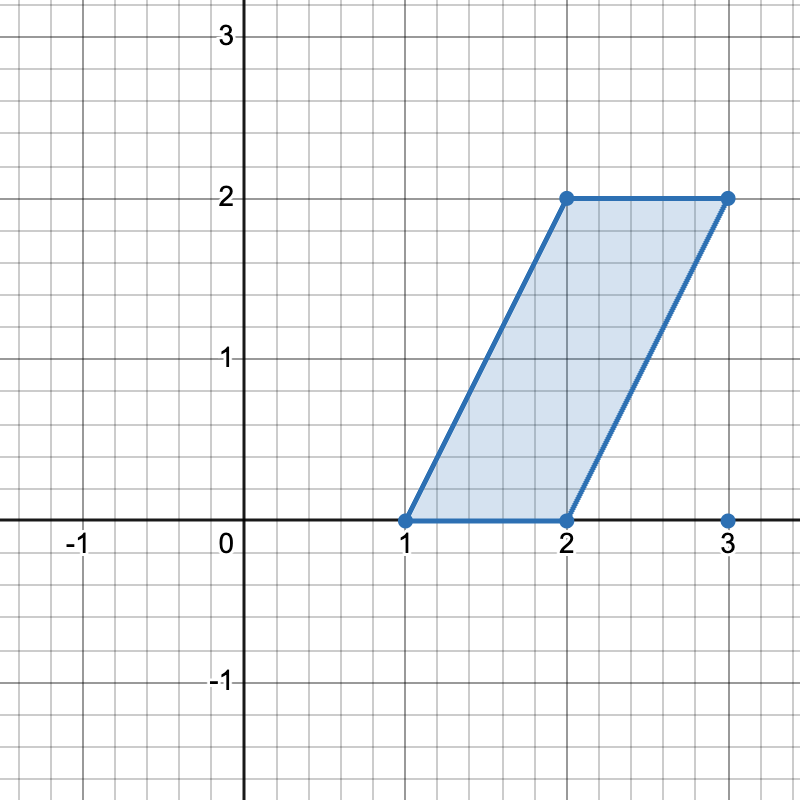

There are three distinct ways to pick four points that form a horizontal trapezoid:

    Using points [1,0], [2,0], [3,2], and [2,2].
    Using points [2,0], [3,0], [3,2], and [2,2].
    Using points [1,0], [3,0], [3,2], and [2,2].

Example 2:

Input: points = [[0,0],[1,0],[0,1],[2,1]]

Output: 1

Explanation:

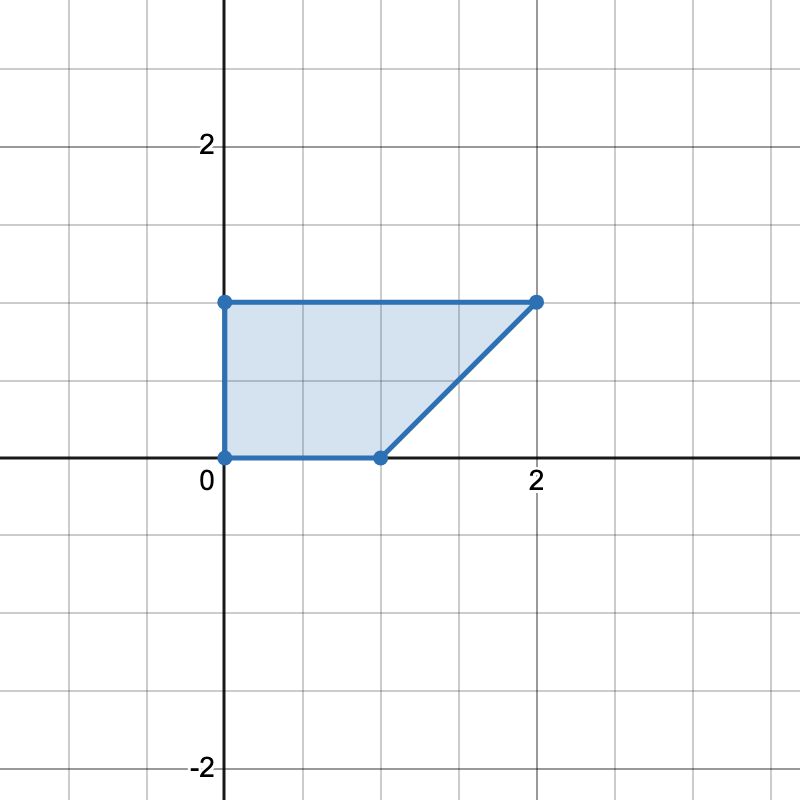

There is only one horizontal trapezoid that can be formed.

 

Constraints:

    4 <= points.length <= 105
    –108 <= xi, yi <= 108
    All points are pairwise distinct.



In [ ]:
class Solution:
    def countTrapezoids(self, points: List[List[int]]) -> int:
        coords = defaultdict(int)
        for _, y in points:
            coords[y] += 1

        ys = list(k for k, v in coords.items() if v >= 2)
        ans = 0
        for i in range(len(ys) - 1):
            for j in range(i + 1, len(ys)):
                bottom_num = coords[ys[i]]
                top_num = coords[ys[j]]
                comb = (top_num * (top_num - 1) // 2) * (bottom_num * (bottom_num - 1) // 2)
                ans = (ans + comb) % 1000000007
        return ans

In [ ]:
class Solution:
    def countTrapezoids(self, points: List[List[int]]) -> int:
        point_num = defaultdict(int)
        mod = 10**9 + 7
        ans, total_sum = 0, 0
        for point in points:
            point_num[point[1]] += 1
        for p_num in point_num.values():
            edge = p_num * (p_num - 1) // 2
            ans = (ans + edge * total_sum) % mod
            total_sum = (total_sum + edge) % mod
        return ans